# A decaying history of error channels
Recall that unital channels are a convex set. Consider the convex combination of the dephasing channels that would have generated the last $N$ errors. Let $M_t$ be the $t^{\text{th}}$ Bloch matrix, then our approximation of the channel is

$$ \hat{M} = \sum_t e^{- \lambda t} M_t $$

We will exploit the structure of the plateaus: say we see no errors for $n$ steps then an $X$ error. We will assume this was generated by the channel

$$ M_t = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1-1/n_t & 0 \\ 0 & 0 & 1-1/n_t \end{array} \right] $$

Really, $M_t$ can be any window of time so long as we get a good estimate of $a_x$, $a_y$, and $a_z$.

We add this channel to our decaying sequence to find our $\hat{M}$. Then we diagonalize $\hat{M}$ to find $\hat{Q}$ and apply $\hat{Q}$ such that we order our axes as $Y$, $Z$, $X$ from lowest to highest rate.

We get $\hat{Q}$ by minimizing

$$ \left\| \hat{Q} \hat{M} \hat{Q}^T - S\right\| $$

where

$$ S = \left[ \begin{array}{ccc} 1- \kappa p & 0 & 0 \\ 0 & 1-p-\kappa p & 0 \\ 0 & 0 & 1-p \end{array} \right] $$

Could it be that Q is upper diag? Could we solve the minimum to the Sylvester equation by using Q = exp(G)?

The norm we are looking for is quite specific. We are only interested in the difference of diagonal elements. So this is technically the... $1$-norm?

$$ \mathrm{Tr} \left[ \left| \hat{Q}\hat{S}\hat{Q}^T - V \right| \right] $$

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import product

def M(px, py, pz):
    M = np.diag([1-py-pz, 1-px-pz, 1-px-py])
    return M

def S(k, p):
    S = M(p, 0, k*p)
    return S

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
class HistoryBank(object):
    def __init__(self, length, decay_rate):
        self.bank = np.zeros((length, 3, 3))
        self.bank[0, :, :] = np.eye(3)
    
    def rotate(self, Q):
        pass

# Q as a superoperator
Consider the swap operator:

$$ F | i \rangle | j \rangle = | j \rangle | i \rangle $$

In [3]:
FSWAP = np.zeros((9, 9))
for esi, esj in product(np.eye(3), np.eye(3)):
    one = np.kron(esi, esj)
    two = np.kron(esj, esi)
    FSWAP = FSWAP + np.outer(one, two)
FSWAP = FSWAP.astype(np.int)
FSWAP

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [4]:
PDIAG = np.zeros((9, 9))
for esi in np.eye(3):
    one = np.kron(esi, esi)
    PDIAG = PDIAG + np.outer(one, one)
PDIAG = PDIAG.astype(np.int)
PDIAG

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

## Swap condition
$$ \underline{Q}^T = F_{12} \underline{Q} F_{12} $$

In [5]:
A1 = np.random.random((3, 3))
A2 = np.random.random((3, 3))
Q = np.kron(A1, A2.T) + np.kron(A2, A1.T)
print np.dot(Q.T, FSWAP) - np.dot(FSWAP, Q)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


## Orthonormality condition
(a)
$$ \underline{Q} \underline{Q}^T = I $$

(b)
$$ \underline{Q}^T \underline{Q} = I $$

In [6]:
A1, _ = np.linalg.qr(np.random.random((3, 3)))
A2, _ = np.linalg.qr(np.random.random((3, 3)))
Q = np.kron(A1, A1.T)
print np.round(np.dot(Q.T, Q), 2)

[[ 1.  0. -0. -0. -0.  0.  0. -0. -0.]
 [ 0.  1.  0. -0. -0. -0.  0.  0.  0.]
 [-0.  0.  1. -0. -0. -0.  0.  0.  0.]
 [-0. -0. -0.  1.  0. -0.  0.  0.  0.]
 [-0. -0. -0.  0.  1.  0. -0.  0. -0.]
 [ 0. -0. -0. -0.  0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0. -0. -0.  1.  0. -0.]
 [-0.  0.  0.  0.  0. -0.  0.  1.  0.]
 [ 0.  0.  0.  0. -0.  0. -0.  0.  1.]]


## Test about the trace
The trace of $QSQ$ is $3-2\kappa p - 2p$. What are the possible diags though?

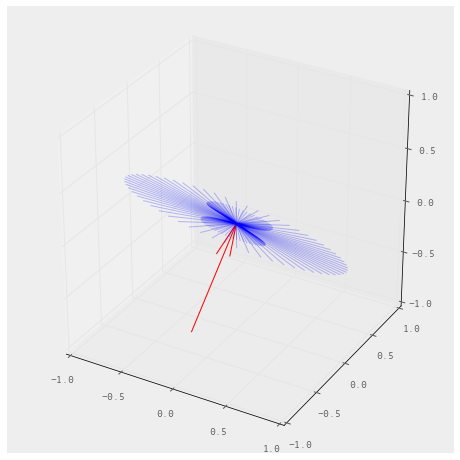

In [7]:
n = 60
c = np.random.random()
psi = 2*np.pi*np.random.random()
alpha, beta = c * np.cos(psi), c * np.sin(psi)

X, Y, Z = np.zeros(n), np.zeros(n), np.zeros(n)
THETA = np.arange(0.0, 2*np.pi*(1-1/n), 2*np.pi/n)
U = 1/c * (alpha * np.sqrt(1 - c ** 2) * np.sin(THETA)
           - beta * np.cos(THETA))
V = 1/c * (beta * np.sqrt(1 - c ** 2) * np.sin(THETA)
           + alpha * np.cos(THETA))
W = - c * np.sin(THETA)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0], alpha, beta, np.sqrt(1 - c ** 2), color="red")
ax.quiver(X, Y, Z, U, V, W, color="blue", alpha=0.25)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()

In [8]:
def test_FAC(s):
    t1 = (1 + s[2] >= np.abs(s[0] + s[1]))
    t2 = (1 - s[2] >= np.abs(s[0] - s[1]))
    return t1 & t2

def random_unital():
    t = False
    while not t:
        s = np.random.random(3)
        t = test_FAC(s)
    return s

$$ \left\| QSQ^T - V \right\|_2 $$

is solved by the sylvester equation for a vectorized $Q \rightarrow \vec{q}$

In [ ]:
k, p = 0.1, 0.1
V = np.diag(random_unital())
X = (np.trace(S(k, p)) - np.trace(V))/3.0 + V
x = np.diag(X)
s = np.diag(S(k, p))

y = x - s[0]

In [69]:
np.prod(y)

0.0065499890424359419

In [73]:
points = np.linspace(-10.0, 10.0, 100)
idx = np.argmin(np.abs(points))
points[idx]

-0.02020202020202011

In [ ]:
t = np.sqrt(() / ())

In [44]:
Xbar = np.array([
        [x[0]     , x[2]-s[0], x[1]-s[1]],
        [x[2]-s[0], x[1]     , x[0]-s[2]],
        [x[1]-s[1], x[0]-s[2], x[2]     ]
    ])

In [46]:
print np.linalg.matrix_rank(Xbar - s[0] * np.eye(3))
print np.linalg.matrix_rank(Xbar - s[1] * np.eye(3))
print np.linalg.matrix_rank(Xbar - s[2] * np.eye(3))

3
3
3


## Numeric optimization.

In [327]:
def Xbar(a, x):
    return np.array([
        [x[0], a[0], a[1]],
        [a[0], x[1], a[2]],
        [a[1], a[2], x[2]]
    ])

def costfn(a, x, s):
    y, _ = np.linalg.eig(Xbar(a, x))
    return np.sum(np.abs(np.sort(y)-np.sort(s)))

def findQhat(S, V):
    s = np.diag(S)
    v = np.diag(V)
    x = (np.sum(s) - np.sum(v)) / 3.0 + v
    a0 = np.array([0.5, 0.5, 0.5])
    res = minimize(lambda a: costfn(a, x, s), a0, method='nelder-mead', options={'xtol': 1e-14})
    a = res.x
    _, Qhat = np.linalg.eig(Xbar(a, x))
    return Qhat

In [431]:
S = np.diag(random_unital())
V = np.diag(random_unital())
X = (np.trace(S) - np.trace(V)) / 3.0 + V
Qhat = findQhat(S, V)

np.diag(np.dot(np.dot(Qhat, S), Qhat.T)) - np.diag(X)

array([ 0.08307496,  0.13842566, -0.22150062])

In [589]:
x = random_unital()
s = random_unital()

xmax = np.max(x)
N = 30
a0 = np.linspace(-xmax, xmax, N)
a1v, a2v, a3v = np.meshgrid(a0, a0, a0)
A = np.array([np.ravel(a1v), np.ravel(a2v), np.ravel(a3v)])
c = np.apply_along_axis(lambda a: costfn(a, x, s), 0, A)

C = np.reshape(c, (N, N, N))

In [590]:
np.min(c)

0.6065644027371967

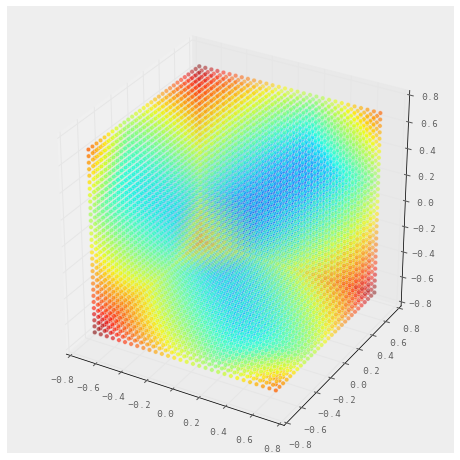

In [591]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1v, a2v, a3v, c=C)

## Y_ij solver

In [586]:
v = random_unital()
s = random_unital()
x = (np.sum(s) - np.sum(v)) / 3.0 + v
Y = np.tile(x, (3, 1)) - np.tile(s, (3, 1)).T
YINV = np.linalg.inv(Y)

In [587]:
yyy = np.product(Y, axis=1)

In [581]:
c = np.dot(YINV, yyy)
d = np.dot(YINV, 2*np.ones(3))

In [583]:
def rootfncoeffs(c, d):
    r0 = c[0] * c[1] * c[2]
    r1 = c[0] * c[1] * d[2] + c[0] * d[1] * c[2] + d[0] * c[1] * c[2]
    r2 = c[0] * d[1] * d[2] + d[0] * c[1] * d[2] + d[0] * d[1] * c[2]-1
    r3 = d[0] * d[1] * d[2]
    return r0, r1, r2, r3

In [584]:
rootfncoeffs(c, d)

(-1.6385379005912747e+40, 1.6027617345829431e+29, 1.311894210124512e+17, 0.0)

## Penalize conditions

I've got a sign error! wooooo!

In [1010]:
from scipy.optimize import minimize, root

FSWAP = np.zeros((9, 9))
for esi, esj in product(np.eye(3), np.eye(3)):
    one = np.kron(esi, esj)
    two = np.kron(esj, esi)
    FSWAP = FSWAP + np.outer(one, two)

PDIAG = np.zeros((9, 9))
for esi in np.eye(3):
    one = np.kron(esi, esi)
    PDIAG = PDIAG + np.outer(one, one)

def PPT(Q):
    out = np.array(np.c_[
            np.r_[Q[0:3, 0:3].T, Q[3:6, 0:3].T, Q[6:9, 0:3].T],
            np.r_[Q[0:3, 3:6].T, Q[3:6, 3:6].T, Q[6:9, 3:6].T],
            np.r_[Q[0:3, 6:9].T, Q[3:6, 6:9].T, Q[6:9, 6:9].T]
        ])
    return out
    
def cost(Q, s, x):
    Q = np.reshape(Q, (9, 9))
    C1 = np.dot(PDIAG, np.dot(Q, s) - x)
    C2 = np.dot(Q, Q.T) - np.eye(9)
    C3 = np.dot(FSWAP, Q.T) - np.dot(Q, FSWAP)
    c = (np.linalg.norm(C1) ** 2
         + np.linalg.norm(C2) ** 2
         + 0.25 * np.linalg.norm(C3) ** 2)
    return c

def der_cost(Q, s, x):
    Q = np.reshape(Q, (9, 9))
    dC1 = np.dot(np.dot(np.outer(s, s), Q.T), PDIAG) - np.outer(s, x)
    dC2 = 2 * np.dot((np.dot(Q, Q.T) - np.eye(9)), Q.T)
    dC3 = Q.T + Q - np.dot(np.dot(FSWAP, Q), FSWAP)
    dc = dC1 + dC2 + dC3
    return np.ndarray.flatten(dc)

s = np.reshape(np.diag(random_unital()), (9,1))
v = np.reshape(np.diag(random_unital()), (9,1))
x = (np.sum(s) - np.sum(v)) / 3.0 * np.reshape(np.eye(3), (9,1)) + v

Qinit, _ = np.linalg.qr(np.random.random((3, 3)))
Qinit = np.random.random((3,3))
Q0 = np.kron(Qinit, Qinit.T)
res = minimize(lambda Q: cost(Q, s, x),
               np.reshape(Q0, (81, 1)),
               jac = lambda Q: der_cost(Q, s, x),
               method = 'BFGS',
               options = {'xtol': 1e-5,
                          'disp': True,
                          'maxiter': 1e5,
                          'gtol': 1e-4})
Qhat = np.reshape(res.x, (9, 9))
Qeff = np.zeros((3,3))
for j in [0,1,2]:
    for k in [0,1,2]:
        Qeff[j,k] = np.sum(Qhat[j::3, k::3])
Qeff = Qeff / np.sqrt(np.dot(Qeff.T, Qeff)[0,0])
S = np.reshape(s, (3,3))
V = np.reshape(v, (3,3))
X = np.reshape(x, (3,3))

print ""
print "S:     {}".format(np.diag(S))
print "X:     {}".format(np.diag(X))
print "QSQ.T: {}".format(np.diag(np.dot(np.dot(Qeff, S), Qeff.T)))
print "Q.TSQ: {}".format(np.diag(np.dot(np.dot(Qeff.T, S), Qeff)))
print ""
print "Qhat swap cost:           {:1.4f}".\
    format(np.linalg.norm(Qhat.T - np.dot(np.dot(FSWAP, Qhat), FSWAP)))
print "Qhat orthonormality cost: {:1.4f}".\
    format(np.linalg.norm(np.dot(Qhat.T, Qhat) - np.eye(9)))
print "Qeff orthonormality cost: {:1.4f}".\
    format(np.linalg.norm(np.dot(Qeff.T, Qeff) - np.eye(3)))
print "Objective cost:           {:1.4f}".\
    format(np.linalg.norm(np.dot(PDIAG, np.dot(Qhat, s) - x)))

         Current function value: 1.836718
         Iterations: 5
         Function evaluations: 30
         Gradient evaluations: 18

S:     [ 0.32996699  0.24794281  0.60491372]
X:     [ 0.35026615  0.32920652  0.50335085]
QSQ.T: [ 0.32443863  0.56931503  0.24069245]
Q.TSQ: [ 0.32801667  0.537449    0.251802  ]

Qhat swap cost:           0.2109
Qhat orthonormality cost: 1.3374
Qeff orthonormality cost: 0.2977
Objective cost:           0.1925


/Users/yan/.miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: OptimizeWarning: Unknown solver options: xtol
